<a href="https://colab.research.google.com/github/RAZOGROUP/REACTION-DIFFUSSION/blob/main/rd_razo_ONLY_GREY_BITMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import spdiags
import codecs
import json
import time
import matplotlib.pyplot as plt
from scipy.sparse.linalg import LinearOperator
from typing_extensions import Self
import glob
from PIL import Image
import os
import scipy.sparse as sp
from scipy.sparse import diags


In [4]:
!mkdir /content/results

In [5]:
class GS():
    def __init__(self, N, fname):
        self.N = N
        self.fname = fname
        self.u = np.ones((N, N), dtype=np.float64)
        self.v = np.zeros((N, N), dtype=np.float64)
        self.name = fname

    def initialize(self):
        N, N2, r = self.N, int(self.N/2), 16
        self.u += 0.02 * np.random.random((N, N))
        self.v += 0.02 * np.random.random((N, N))
        self.u[N2-r:N2+r, N2-r:N2+r] = 0.50
        self.v[N2-r:N2+r, N2-r:N2+r] = 0.25
        return self.u, self.v

    def laplacian (self):
        N = self.N
        e= np.ones (N**2)
        e2 = ([1]* (N-1)+[0]) *N
        e3 = ([0]+[1]*(N-1)) *N
        A = spdiags([-4*e, e2,e3,e,e], [0,-1,1,-N,N], N**2, N**2)
        return A


    def integrate(self, iteration, Du, Dv, F, K, L):
        N = self.N

        # 3d array into 2d array
        u = self.u.reshape((N*N))
        v = self.v.reshape((N*N))

        # calculate GREY SCOTT
        for i in range(int(iteration)):
            uvv = u * v * v
            u += (Du * L.dot(u) - uvv + F * (1 - u))
            v += (Dv * L.dot(v) + uvv - (F + K) * v)

        self.u = u.reshape(N, N)
        self.v = v.reshape(N, N)

        return

    def plot(self):
        # Vizz the result
        u = self.u
        v = self.v

        f = plt.figure(figsize=(25, 10), dpi=400, facecolor='w', edgecolor='none')
        sp = f.add_subplot(1, 2, 1)
        plt.pcolor(u, cmap='Greys')
        plt.axis('tight')

        sp = f.add_subplot(1, 2, 2)
        plt.pcolor(v, cmap='Greys')
        plt.axis('tight')
        plt.show()

        return


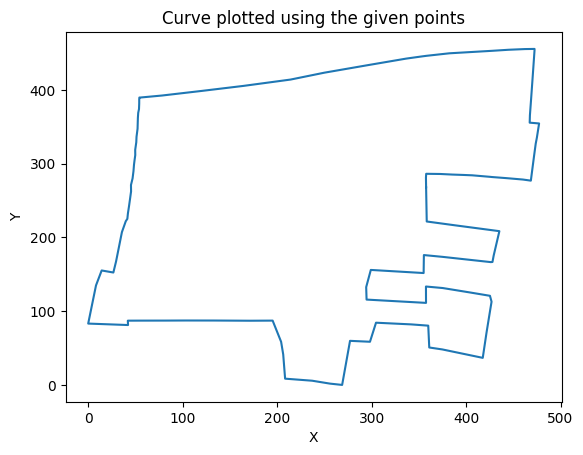

In [2]:
# TO CREATE A PLOT AS PER SITE
# Dataset
x = np.array([357.674,357.509,357.762,372.709,385.631,397.133,406.435,425.219,427.305,442.993,460.172,468.559,470.318,471.971,473.7,474.935,477.292,467.323,467.562,468.722,470.284,472.421,472.469,462.278,444.85,427.135,382.252,358.02,352.532,336.489,296.151,249.851,214.302,164.205,120.594,78.24,55.207,54.157,54.019,53.995,53.778,52.948,52.589,52.25,51.143,50.902,49.753,49.825,49.067,48.474,47.923,46.973,45.283,45.382,44.242,43.21,42.037,41.442,39.783,35.685,29.49,26.632,14.252,8.255,6.7303e-11,42.182,41.929,55.312,81.935,102.508,132.817,171.078,195.235,204.211,206.423,208.435,237.121,255.882,268.801,277.157,298.269,304.661,341.847,359.941,361.014,374.905,417.642,421.621,425.133,426.958,425.269,404.652,375.288,357.519,357.589,294.663,294.253,299.148,355.058,355.329,375.135,426.218,427.924,429.219,435.238,387.795,358.345,357.674])
y = np.array([267.958,280.846,286.178,285.924,285.122,284.617,284.12,282.079,281.801,280.263,278.393,276.902,294.348,310.565,326.977,335.219,354.409,355.476,365.529,385.778,413.874,453.063,455.44,455.235,454.292,452.845,449.499,446.089,445.167,442.298,433.477,423.2,413.93,405.296,398.58,392.287,389.561,389.561,387.061,381.425,373.996,368.855,361.956,347.277,336.291,328.965,318.594,311.529,304.572,298.42,289.684,279.95,270.998,262.344,251.686,242.274,232.451,225.13,221.943,207.091,167.334,152.369,155.135,134.858,83.146,81.171,87.087,87.154,87.203,87.321,87.283,87.014,87.17,58.444,41.336,8.483,5.694,1.773,1.1391e-10,59.743,58.513,84.338,82.053,80.338,50.73,48.09,36.687,70.805,98.575,112.784,120.797,125.213,131.323,133.386,111.2,115.674,132.571,155.876,151.653,176.021,173.582,166.461,166.67,175.428,208.407,216.428,221.524,267.958])

# Plotting the Graph
plt.plot(x, y)
plt.title("Curve plotted using the given points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

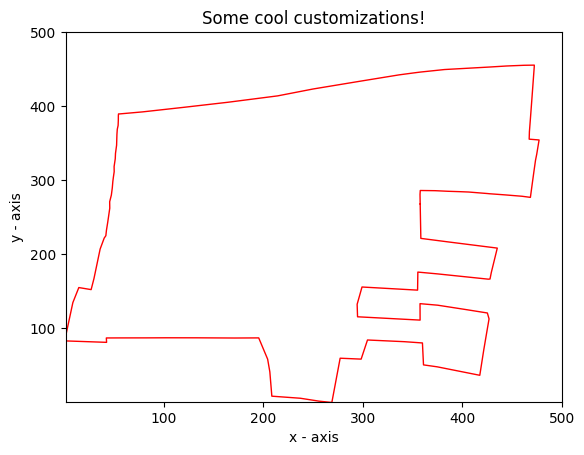

In [14]:
# x axis values
x = [357.674,357.509,357.762,372.709,385.631,397.133,406.435,425.219,427.305,442.993,460.172,468.559,470.318,471.971,473.7,474.935,477.292,467.323,467.562,468.722,470.284,472.421,472.469,462.278,444.85,427.135,382.252,358.02,352.532,336.489,296.151,249.851,214.302,164.205,120.594,78.24,55.207,54.157,54.019,53.995,53.778,52.948,52.589,52.25,51.143,50.902,49.753,49.825,49.067,48.474,47.923,46.973,45.283,45.382,44.242,43.21,42.037,41.442,39.783,35.685,29.49,26.632,14.252,8.255,6.7303e-11,42.182,41.929,55.312,81.935,102.508,132.817,171.078,195.235,204.211,206.423,208.435,237.121,255.882,268.801,277.157,298.269,304.661,341.847,359.941,361.014,374.905,417.642,421.621,425.133,426.958,425.269,404.652,375.288,357.519,357.589,294.663,294.253,299.148,355.058,355.329,375.135,426.218,427.924,429.219,435.238,387.795,358.345,357.674]
# corresponding y axis values
y = [267.958,280.846,286.178,285.924,285.122,284.617,284.12,282.079,281.801,280.263,278.393,276.902,294.348,310.565,326.977,335.219,354.409,355.476,365.529,385.778,413.874,453.063,455.44,455.235,454.292,452.845,449.499,446.089,445.167,442.298,433.477,423.2,413.93,405.296,398.58,392.287,389.561,389.561,387.061,381.425,373.996,368.855,361.956,347.277,336.291,328.965,318.594,311.529,304.572,298.42,289.684,279.95,270.998,262.344,251.686,242.274,232.451,225.13,221.943,207.091,167.334,152.369,155.135,134.858,83.146,81.171,87.087,87.154,87.203,87.321,87.283,87.014,87.17,58.444,41.336,8.483,5.694,1.773,1.1391e-10,59.743,58.513,84.338,82.053,80.338,50.73,48.09,36.687,70.805,98.575,112.784,120.797,125.213,131.323,133.386,111.2,115.674,132.571,155.876,151.653,176.021,173.582,166.461,166.67,175.428,208.407,216.428,221.524,267.958]

# plotting the points
plt.plot(x, y, color='red', linestyle='solid', linewidth = 1,
         marker='o', markerfacecolor='blue', markersize=0)

# setting x and y axis range
plt.ylim(1,500)
plt.xlim(1,500)

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# giving a title to my graph
plt.title('Some cool customizations!')

# function to show the plot
plt.show()

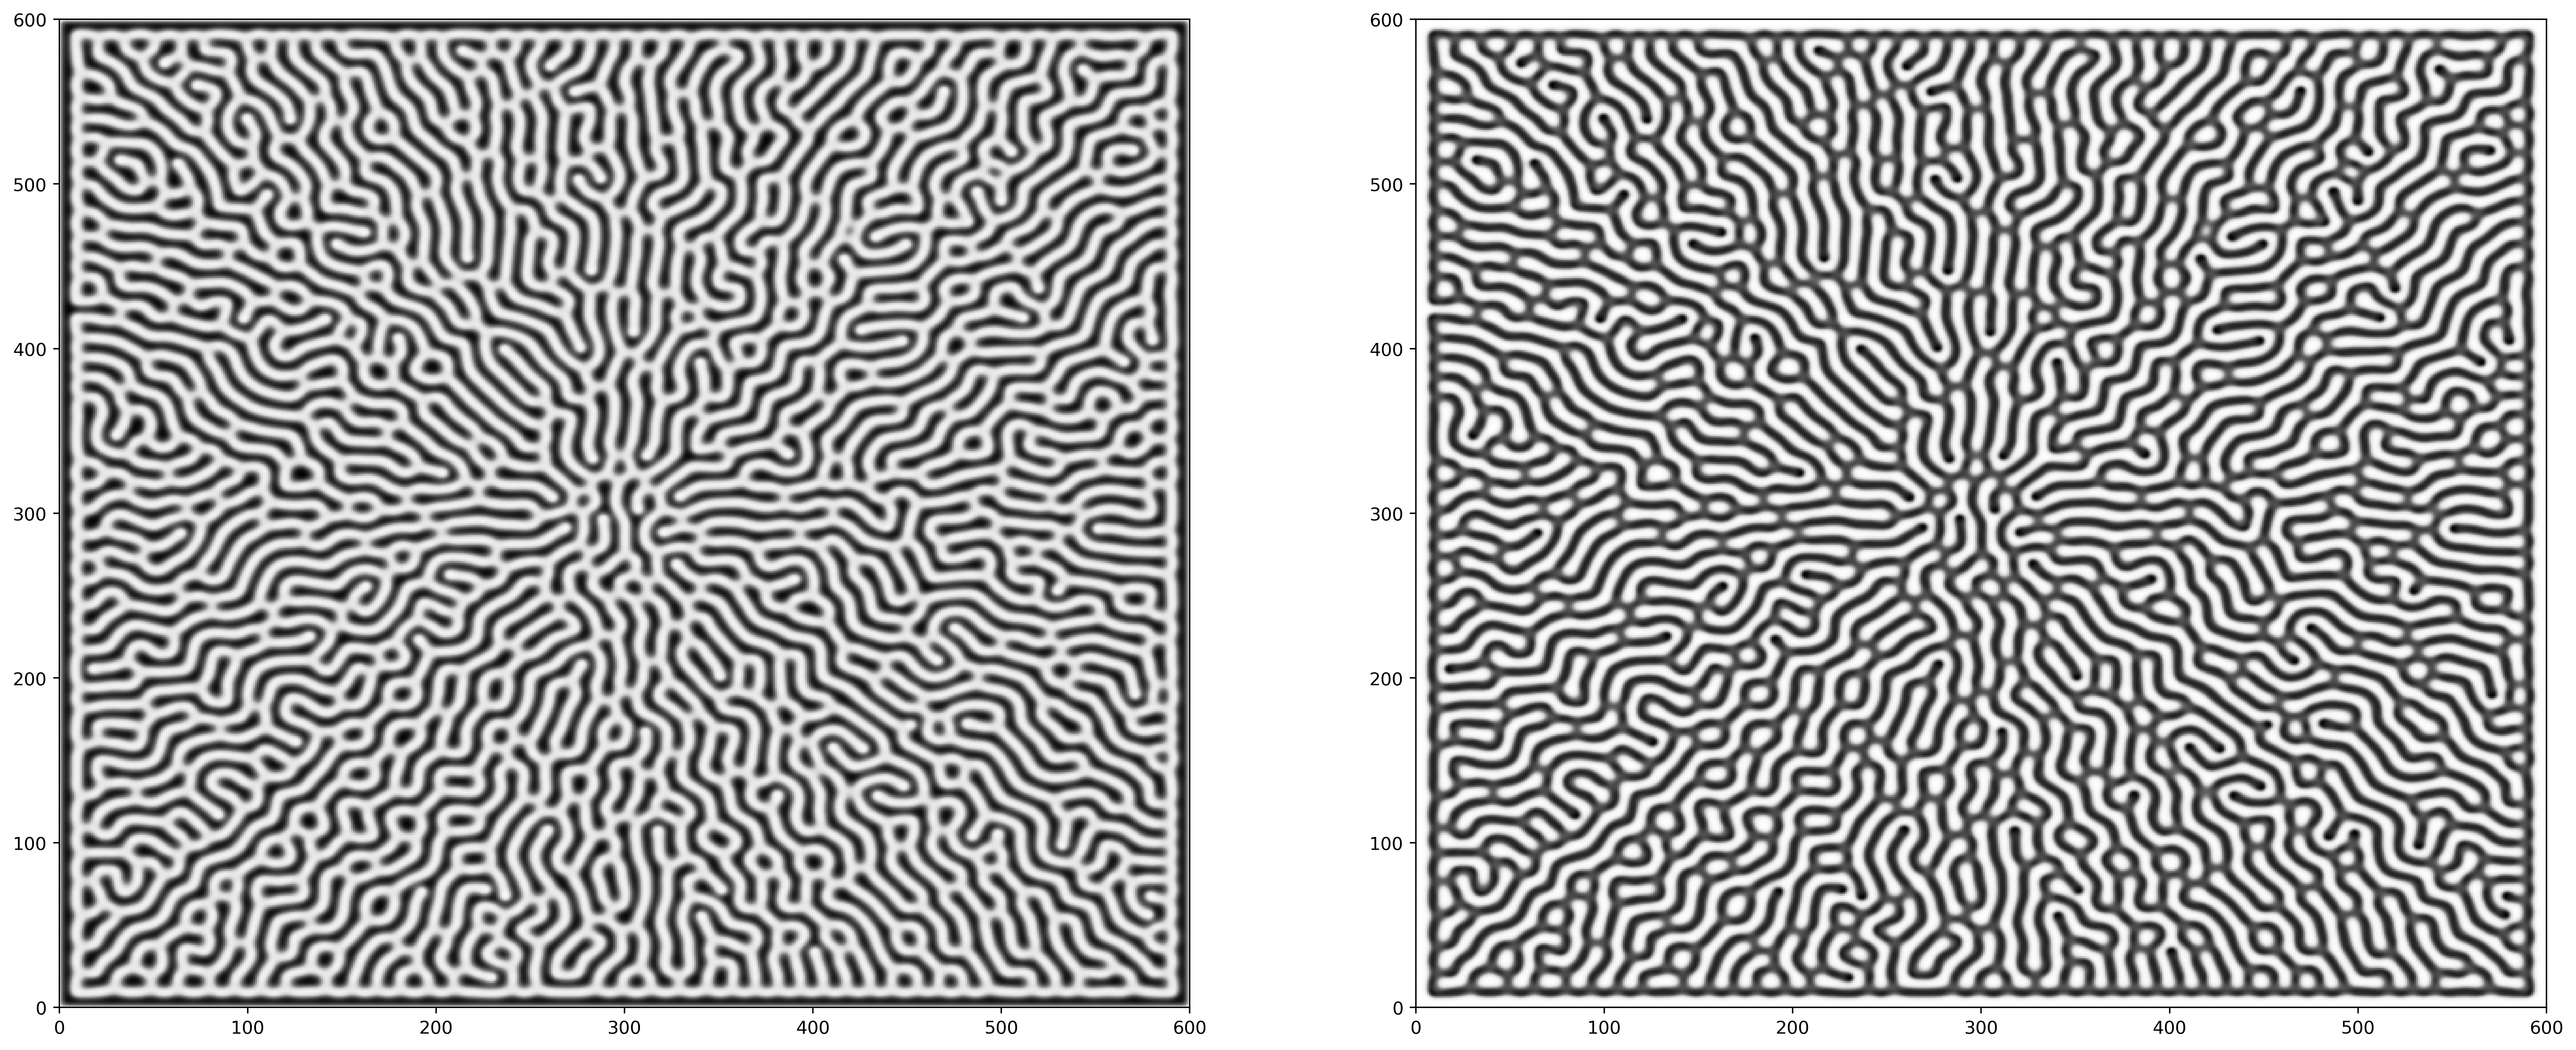

Elapsed time: 590.92 seconds


In [7]:
#### Parameters
Du, Dv, F, K = 0.16, 0.08, 0.060, 0.062 #coral


N = 600
iterations = 50000
fname = 'test'

# Create GSsolver
GSsolver = GS(N, fname)

# Record the start time
st = time.time()

# Create the laplacian
L = GSsolver.laplacian()

# Initialize the grid
GSsolver.initialize()

# Solve the equations and integrate
GSsolver.integrate(iterations, Du, Dv, F, K, L)

# Show output
GSsolver.plot()

# Record the end time
et = time.time()

# Print the elapsed time
print("Elapsed time: {:.2f} seconds".format(et - st))

In [ ]:
###PARAMETERs

#Du, Dv, F, K = 0.16, 0.08, 0.060, 0.062 #coral
#Du, Dv, F, K = 0.16, 0.06, 0.035, 0.065 #bacteria 1
##Du, Dv, F, K = 0.14, 0.06, 0.035, 0.065 #bacteria 2
#Du, Dv, F, K = 0.19, 0.05, 0.060, 0.062 #fingerprint
#Du, Dv, F, K = 0.10, 0.10, 0.018, 0.050 #spiral
#Du, Dv, F, K = 0.12, 0.08, 0.020, 0.050 #spiral dense
#Du, Dv, F, K = 0.10, 0.16, 0.020, 0.050 #spiral fast
#Du, Dv, F, K = 0.16, 0.08, 0.020, 0.055 #unstable
#Du, Dv, F, K = 0.16, 0.08, 0.050, 0.065 #worm 1
#Du, Dv, F, K = 0.16, 0.08, 0.054, 0.063 #worm 2
#Du, Dv, F, K = 0.16, 0.08, 0.035, 0.060 #zebrafish